#### Fraud Detection in Electricity and Gas Consumption Challenge


##### Problem Statments

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

 In this project, its important to understand the two types of datasets: The client data and the invoice data
Client data
(Client_train.csv and Client_test.csv
) basically contains client informationwhile the invoice data
(Invoice_train.csv and Invoice_test.csv)
contains billing information of theclients.
As described in the competition page:
- Client_train.csv
 Client information in the train population.
- Invoice_train.csv
 Client's invoice in the train set.
- Client_test.csv
 Client information for the test population.
- Invoice_test.csv
 Client's invoice in the test set.
SampleSubmission.csv
is an example of what your submission fi le should look like. The order ofthe rows does not matter, but the names of the IDs must be correct. The column "target" is your prediction.

In [3]:
# Read in the files
df_client_test =  pd.read_csv('test\client_test.csv')
df_invoice_test = pd.read_csv('test\invoice_test.csv')
df_client_train = pd.read_csv('train\client_train.csv')
df_invoice_train = pd.read_csv('train\invoice_train.csv', low_memory=False)

In [5]:
df_client_test.head()

,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004
3,60,test_Client_100,11,101,08/10/1992
4,62,test_Client_1000,11,301,21/07/1977


In [6]:
df_invoice_test.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,test_Client_0,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,test_Client_0,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC


In [7]:
df_client_train.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [8]:
df_invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [11]:

#get the size of the various datasets
print(df_client_train.shape, df_invoice_train.shape, df_client_test.shape, df_invoice_test.shape)

(135493, 6) (4476749, 16) (58069, 5) (1939730, 16)


###### From the above, we can deduce that we have the following 
* Client train: 135,493 rows and 6 columns * 
Invoice train: 4,476,749 rows and 16 column
* Client test: 58,069 rows and 5 columns
* Invoice test: 1,939,730 and 16 columns mns

In [13]:
# Make copies of all datasets 
df_client_train_copy = df_client_train.copy()
df_invoice_train_copy = df_invoice_train.copy()
df_client_test_copy = df_client_test.copy()
df_invoice_test_copy = df_invoice_test.copy()

In [14]:
df_client_test.head()

,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004
3,60,test_Client_100,11,101,08/10/1992
4,62,test_Client_1000,11,301,21/07/1977


In [15]:
# Rename disrict column to District
df_client_test.columns.values[0] = 'District'

In [16]:
df_client_test.head()

,District,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004
3,60,test_Client_100,11,101,08/10/1992
4,62,test_Client_1000,11,301,21/07/1977


In [17]:
df_invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [18]:
df_invoice_train['counter_type'].value_counts()

counter_type
ELEC    3079406
GAZ     1397343
Name: count, dtype: int64

In [20]:
# Variable re-assignment 
# Assign ElEC to 0 and GAZ to 1
df_invoice_train['counter_type'] = df_invoice_train['counter_type'].replace({'ELEC':0,'GAZ':1})

In [22]:
#Check
df_invoice_train['counter_type'].value_counts() 

counter_type
0    3079406
1    1397343
Name: count, dtype: int64

##### Furthermore,It was noticed that the test files (client test and invoice test files) came as separate files, same with that of train files (client train and invoice train files). Hence we can merge them with their respective transaction files (invoice train and invoice train files) in order to have only two files to work with thus for simplicity 

In [6]:
# For Train Data, Client train will be merged with Invoice Train
df_merged_client_train = df_client_train.merge(df_invoice_train, on='client_id' ,how='inner')

In [24]:
#check
df_merged_client_train

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,0
1,60,train_Client_0,11,101,31/12/1994,0.0,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,0
2,60,train_Client_0,11,101,31/12/1994,0.0,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,0
3,60,train_Client_0,11,101,31/12/1994,0.0,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,0
4,60,train_Client_0,11,101,31/12/1994,0.0,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,60,train_Client_99998,11,101,22/12/1993,0.0,2005-08-19,10,1253571,0,...,9,1,400,135,0,0,3197,3732,8,0
4476745,60,train_Client_99998,11,101,22/12/1993,0.0,2005-12-19,10,1253571,0,...,6,1,200,6,0,0,3732,3938,4,0
4476746,60,train_Client_99999,11,101,18/02/1986,0.0,1996-09-25,11,560948,0,...,6,1,259,0,0,0,13884,14143,4,0
4476747,60,train_Client_99999,11,101,18/02/1986,0.0,1996-05-28,11,560948,0,...,6,1,603,0,0,0,13281,13884,4,0


In [41]:
# Rename disrict column to District
df_merged_client_train.columns.values[0] = 'District'

##### The Same will be done for test data too that is the client_test will be merged with the invoice_test

In [4]:
# For Test Data, Client test will be merged with Invoice Test
df_merged_client_test = df_client_test.merge(df_invoice_test, on='client_id' ,how='inner')

In [37]:
#Check
df_merged_client_test 

,District,client_id,client_catg,region,creation_date,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,62,test_Client_0,11,307,28/05/2002,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,62,test_Client_0,11,307,28/05/2002,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,62,test_Client_0,11,307,28/05/2002,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,62,test_Client_0,11,307,28/05/2002,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,62,test_Client_0,11,307,28/05/2002,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939725,69,test_Client_9999,11,104,14/03/1990,2010-03-11,11,869269,0,203,6,1,248,0,0,0,21114,21362,4,ELEC
1939726,69,test_Client_9999,11,104,14/03/1990,2011-03-15,11,869269,0,203,6,1,260,0,0,0,21362,21622,4,ELEC
1939727,69,test_Client_9999,11,104,14/03/1990,2012-12-03,11,869269,0,203,6,1,312,0,0,0,22272,22584,4,ELEC
1939728,69,test_Client_9999,11,104,14/03/1990,2009-07-01,11,869269,0,203,6,1,236,0,0,0,19909,20145,4,ELEC


In [38]:
# Variable re-assignment 
# Assign ElEC to 0 and GAZ to 1
df_merged_client_test['counter_type'] = df_merged_client_test['counter_type'].replace({'ELEC':0,'GAZ':1})

In [39]:
#Check
df_merged_client_test 

,District,client_id,client_catg,region,creation_date,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,62,test_Client_0,11,307,28/05/2002,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,0
1,62,test_Client_0,11,307,28/05/2002,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,0
2,62,test_Client_0,11,307,28/05/2002,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,0
3,62,test_Client_0,11,307,28/05/2002,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,0
4,62,test_Client_0,11,307,28/05/2002,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939725,69,test_Client_9999,11,104,14/03/1990,2010-03-11,11,869269,0,203,6,1,248,0,0,0,21114,21362,4,0
1939726,69,test_Client_9999,11,104,14/03/1990,2011-03-15,11,869269,0,203,6,1,260,0,0,0,21362,21622,4,0
1939727,69,test_Client_9999,11,104,14/03/1990,2012-12-03,11,869269,0,203,6,1,312,0,0,0,22272,22584,4,0
1939728,69,test_Client_9999,11,104,14/03/1990,2009-07-01,11,869269,0,203,6,1,236,0,0,0,19909,20145,4,0


In [30]:
df_merged_client_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939730 entries, 0 to 1939729
Data columns (total 20 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   District              int64 
 1   client_id             object
 2   client_catg           int64 
 3   region                int64 
 4   creation_date         object
 5   invoice_date          object
 6   tarif_type            int64 
 7   counter_number        int64 
 8   counter_statue        int64 
 9   counter_code          int64 
 10  reading_remarque      int64 
 11  counter_coefficient   int64 
 12  consommation_level_1  int64 
 13  consommation_level_2  int64 
 14  consommation_level_3  int64 
 15  consommation_level_4  int64 
 16  old_index             int64 
 17  new_index             int64 
 18  months_number         int64 
 19  counter_type          int64 
dtypes: int64(17), object(3)
memory usage: 296.0+ MB


In [7]:
df_merged_client_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   disrict               int64  
 1   client_id             object 
 2   client_catg           int64  
 3   region                int64  
 4   creation_date         object 
 5   target                float64
 6   invoice_date          object 
 7   tarif_type            int64  
 8   counter_number        int64  
 9   counter_statue        object 
 10  counter_code          int64  
 11  reading_remarque      int64  
 12  counter_coefficient   int64  
 13  consommation_level_1  int64  
 14  consommation_level_2  int64  
 15  consommation_level_3  int64  
 16  consommation_level_4  int64  
 17  old_index             int64  
 18  new_index             int64  
 19  months_number         int64  
 20  counter_type          object 
dtypes: float64(1), int64(15), object(5)
memory usage: 717.3+ MB


##### Since we have a large train and test datasets with multiple client_id. we can groupby the client_id and find the mean

In [12]:
df_mean_client_train = df_merged_client_train.groupby(['client_id'], as_index=False).mean(numeric_only=True)

In [13]:
df_mean_client_train

,client_id,disrict,client_catg,region,target,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
0,train_Client_0,60.0,11.0,101.0,0.0,11.000000,1.335667e+06,203.685714,6.971429,1.0,352.400000,10.571429,0.000000,0.000000,9444.542857,9807.514286,4.628571
1,train_Client_1,69.0,11.0,107.0,0.0,11.000000,6.789020e+05,203.000000,7.216216,1.0,557.540541,0.000000,0.000000,0.000000,14330.756757,14888.297297,4.324324
2,train_Client_10,62.0,11.0,301.0,0.0,11.000000,5.727650e+05,203.222222,7.055556,1.0,798.611111,37.888889,0.000000,0.000000,32873.000000,33709.500000,6.444444
3,train_Client_100,69.0,11.0,105.0,0.0,11.000000,2.078000e+03,413.000000,6.150000,1.0,1.200000,0.000000,0.000000,0.000000,94.150000,95.350000,4.200000
4,train_Client_1000,62.0,11.0,303.0,0.0,11.000000,1.957500e+04,207.000000,8.857143,1.0,663.714286,104.857143,117.357143,36.714286,6900.428571,7823.071429,3.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135488,train_Client_99995,62.0,11.0,304.0,0.0,24.887324,5.423355e+05,110.267606,6.000000,1.0,1.957746,0.000000,0.000000,0.000000,7.295775,7.295775,4.225352
135489,train_Client_99996,63.0,11.0,311.0,0.0,25.853659,1.837554e+06,103.536585,8.487805,1.0,185.853659,0.756098,0.000000,0.000000,1216.780488,1403.390244,3.902439
135490,train_Client_99997,63.0,11.0,311.0,0.0,22.277778,1.602303e+05,128.444444,9.000000,1.0,273.083333,0.000000,0.000000,0.000000,2533.388889,2806.472222,4.111111
135491,train_Client_99998,60.0,11.0,101.0,0.0,10.000000,1.253571e+06,202.000000,7.500000,1.0,300.000000,70.500000,0.000000,0.000000,3464.500000,3835.000000,6.000000


##### We do the same for Test Data too

In [14]:
df_mean_client_test = df_merged_client_test.groupby(['client_id'], as_index=False).mean(numeric_only=True)

In [15]:
df_mean_client_test

,client_id,disrict,client_catg,region,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
0,test_Client_0,62.0,11.0,307.0,11.000000,6.512080e+05,0.000000,203.000000,6.810811,1.0,488.135135,3.243243,0.000000,0.000000,11389.837838,11881.216216,4.378378
1,test_Client_1,69.0,11.0,103.0,11.000000,1.747600e+05,0.045455,433.000000,7.636364,1.0,1091.409091,843.136364,182.318182,586.318182,29380.772727,32083.954545,4.545455
2,test_Client_10,62.0,11.0,310.0,23.540541,3.468089e+06,0.000000,119.648649,7.459459,1.0,554.040541,37.364865,15.743243,0.162162,11774.054054,12381.364865,4.000000
3,test_Client_100,60.0,11.0,101.0,25.500000,5.866505e+05,0.000000,104.000000,6.575000,1.0,244.350000,0.000000,0.000000,0.000000,13623.725000,13868.075000,3.900000
4,test_Client_1000,62.0,11.0,301.0,20.849057,1.614115e+06,0.094340,135.754717,7.905660,1.0,568.188679,145.056604,33.679245,0.000000,13927.471698,14676.584906,4.528302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58064,test_Client_9995,63.0,11.0,399.0,25.500000,7.367730e+05,0.000000,104.000000,6.000000,1.0,461.250000,0.000000,0.000000,0.000000,10361.250000,10822.500000,4.000000
58065,test_Client_9996,63.0,11.0,311.0,25.500000,2.148623e+05,0.152174,104.000000,6.891304,1.0,181.565217,0.000000,0.000000,0.000000,1917.608696,2099.173913,4.217391
58066,test_Client_9997,60.0,11.0,101.0,21.186441,1.382095e+12,0.000000,128.542373,6.627119,1.0,160.559322,11.932203,0.000000,0.000000,11959.728814,12132.220339,4.033898
58067,test_Client_9998,60.0,11.0,101.0,11.000000,2.168700e+12,0.000000,420.000000,9.000000,1.0,800.000000,400.000000,727.000000,0.000000,0.000000,1927.000000,4.000000


#### We can now do some data cleaning processes

In [16]:
### Checking for null values
df_mean_client_train.isnull().sum()

client_id               0
disrict                 0
client_catg             0
region                  0
target                  0
tarif_type              0
counter_number          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
dtype: int64

In [17]:
df_mean_client_test.isnull().sum()

client_id               0
disrict                 0
client_catg             0
region                  0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
dtype: int64

#### We can see that there are no null values across the both the train and train datasets


In [18]:
#### Check for duplicates
df_mean_client_train.duplicated().sum()

0

In [19]:
df_mean_client_test.duplicated().sum()

0

#### We can see that there are also no duplicated values across the both the train and train datasets


In [21]:
df_mean_client_train.describe()

,disrict,client_catg,region,target,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,1.354930e+05,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,1.354930e+05,1.354930e+05,135493.000000
mean,63.511222,11.512506,206.159809,0.055841,17.165116,6.909197e+11,199.546560,7.398796,1.001692,432.366021,115.334253,27.634241,73.097981,1.433351e+04,1.495876e+04,33.014595
std,3.354400,4.423761,104.207044,0.229614,7.053088,3.789277e+12,95.431889,1.511180,0.223390,758.003977,747.416809,157.294518,814.216626,2.697593e+04,2.761697e+04,2745.088330
min,60.000000,11.000000,101.000000,0.000000,9.777778,0.000000e+00,0.000000,6.000000,0.888889,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000
25%,62.000000,11.000000,103.000000,0.000000,11.000000,2.622571e+05,114.757143,6.812500,1.000000,215.280702,0.000000,0.000000,0.000000,2.953889e+03,3.385000e+03,4.000000
50%,62.000000,11.000000,107.000000,0.000000,11.000000,6.691836e+05,203.000000,7.285714,1.000000,355.640625,4.987179,0.000000,0.000000,8.145750e+03,8.674342e+03,4.200000
75%,69.000000,11.000000,307.000000,0.000000,25.254237,2.611890e+06,207.000000,7.962963,1.000000,541.888889,63.636364,3.929825,0.000000,1.764826e+04,1.828554e+04,4.657143
max,69.000000,51.000000,399.000000,1.000000,45.000000,2.739110e+13,600.000000,413.000000,50.000000,99920.000000,115683.000000,38526.857143,79179.777778,1.463001e+06,1.542750e+06,602244.750000


In [22]:
df_mean_client_test.describe()

,disrict,client_catg,region,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,58069.000000,58069.000000,58069.000000,58069.000000,5.806900e+04,58069.000000,58069.000000,58069.000000,58069.000000,58069.000000,58069.000000,58069.000000,58069.000000,5.806900e+04,5.806900e+04,58069.000000
mean,63.510617,11.507224,206.018461,17.171022,7.139074e+11,0.060805,199.964051,7.397640,1.000506,434.250930,117.842324,27.582771,67.318815,1.450099e+04,1.512433e+04,52.082383
std,3.356708,4.395923,104.144028,7.048925,3.875706e+12,0.244907,95.693468,0.859715,0.044022,593.375548,754.462519,129.534706,643.555100,2.710235e+04,2.778788e+04,4053.716751
min,60.000000,11.000000,101.000000,9.862069,0.000000e+00,0.000000,5.000000,6.000000,0.929825,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000
25%,62.000000,11.000000,103.000000,11.000000,2.630093e+05,0.000000,115.088235,6.818182,1.000000,218.545455,0.000000,0.000000,0.000000,2.998633e+03,3.424968e+03,4.000000
50%,62.000000,11.000000,107.000000,11.000000,6.647937e+05,0.000000,203.000000,7.291667,1.000000,358.473684,5.426667,0.000000,0.000000,8.288000e+03,8.823686e+03,4.200000
75%,69.000000,11.000000,307.000000,25.245614,2.646471e+06,0.037037,207.000000,7.961538,1.000000,544.666667,64.466667,4.028169,0.000000,1.792332e+04,1.856467e+04,4.647059
max,69.000000,51.000000,399.000000,45.000000,2.739110e+13,5.000000,600.000000,9.000000,10.000000,57651.000000,80717.500000,11769.556391,44282.500000,1.131148e+06,1.143551e+06,524338.616279


#### Visualization of the train data

<Axes: xlabel='target', ylabel='consommation_level_1'>

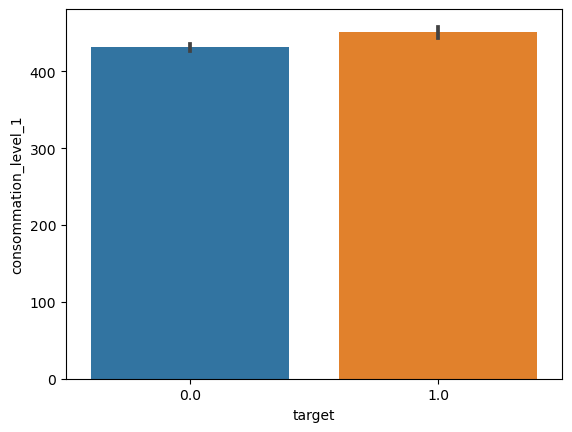

In [28]:
sb.barplot(x= 'target', y='consommation_level_1', data= df_mean_client_train)


<Axes: xlabel='target', ylabel='consommation_level_2'>

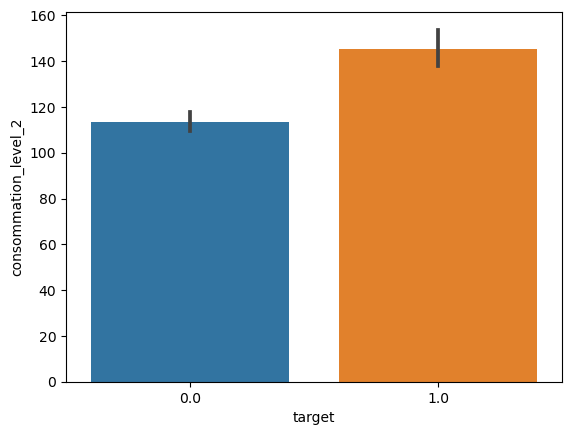

In [29]:
sb.barplot(x= 'target', y='consommation_level_2', data= df_mean_client_train)

<Axes: xlabel='target', ylabel='consommation_level_3'>

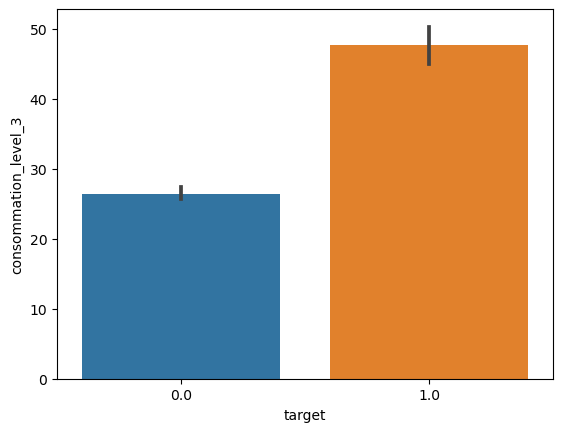

In [30]:
sb.barplot(x= 'target', y='consommation_level_3', data= df_mean_client_train)

<Axes: xlabel='target', ylabel='consommation_level_4'>

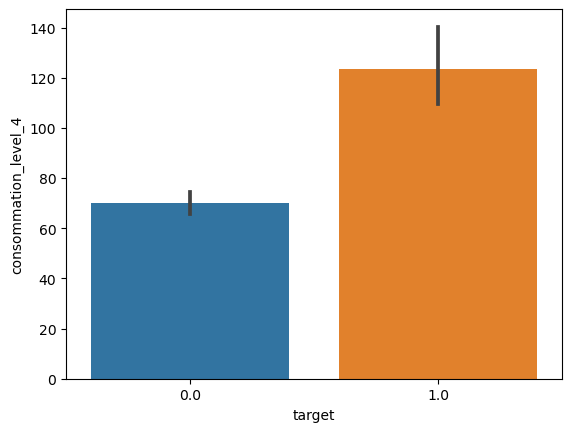

In [31]:
sb.barplot(x= 'target', y='consommation_level_4', data= df_mean_client_train)

### Scale the datasets with the standard scaler

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
num_cols = ['disrict',	'client_catg',	'region',	'tarif_type',
            'counter_number',	'counter_code',	'reading_remarque',	'counter_coefficient',	
            'consommation_level_1',	'consommation_level_2',	'consommation_level_3',	'consommation_level_4',
            'old_index',	'new_index',	'months_number']

In [36]:
df_mean_client_train[num_cols] = scaler.fit_transform(df_mean_client_train[num_cols])

In [37]:
df_mean_client_train

,client_id,disrict,client_catg,region,target,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
0,train_Client_0,-1.046755,-0.115853,-1.009147,0.0,-0.874105,-0.182336,0.043373,-0.282805,-0.007575,-0.105496,-0.140167,-0.175685,-0.089777,-0.181235,-0.186525,-0.010341
1,train_Client_1,1.636298,-0.115853,-0.951569,0.0,-0.874105,-0.182336,0.036188,-0.120820,-0.007575,0.165138,-0.154311,-0.175685,-0.089777,-0.000102,-0.002552,-0.010452
2,train_Client_10,-0.450521,-0.115853,0.910116,0.0,-0.874105,-0.182336,0.038516,-0.227135,-0.007575,0.483172,-0.103618,-0.175685,-0.089777,0.687263,0.678960,-0.009679
3,train_Client_100,1.636298,-0.115853,-0.970761,0.0,-0.874105,-0.182336,2.236718,-0.826375,-0.007575,-0.568820,-0.154311,-0.175685,-0.089777,-0.527856,-0.538201,-0.010497
4,train_Client_1000,-0.450521,-0.115853,0.929309,0.0,-0.874105,-0.182336,0.078102,0.965042,-0.007575,0.305208,-0.014018,0.570416,-0.044686,-0.275546,-0.258382,-0.010674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135488,train_Client_99995,-0.450521,-0.115853,0.938905,0.0,1.094873,-0.182336,-0.935529,-0.925635,-0.007575,-0.567820,-0.154311,-0.175685,-0.089777,-0.531076,-0.541389,-0.010488
135489,train_Client_99996,-0.152404,-0.115853,1.006080,0.0,1.231882,-0.182336,-1.006061,0.720637,-0.007575,-0.325214,-0.153299,-0.175685,-0.089777,-0.486240,-0.490837,-0.010605
135490,train_Client_99997,-0.152404,-0.115853,1.006080,0.0,0.724886,-0.182336,-0.745059,1.059576,-0.007575,-0.210135,-0.154311,-0.175685,-0.089777,-0.437433,-0.440032,-0.010529
135491,train_Client_99998,-1.046755,-0.115853,-1.009147,0.0,-1.015887,-0.182336,0.025709,0.066970,-0.007575,-0.174625,-0.059986,-0.175685,-0.089777,-0.402917,-0.402789,-0.009841


In [38]:
## We do the same for test data
df_mean_client_test[num_cols] = scaler.fit_transform(df_mean_client_test[num_cols])
df_mean_client_test

,client_id,disrict,client_catg,region,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
0,test_Client_0,-0.450033,-0.115386,0.969642,-0.875463,-0.184202,0.000000,0.031726,-0.682591,-0.011494,0.090810,-0.151896,-0.212939,-0.104605,-0.114794,-0.116710,-0.011768
1,test_Client_1,1.635361,-0.115386,-0.989201,-0.875463,-0.184202,0.045455,2.435255,0.277681,-0.011494,1.107501,0.961347,1.194558,0.806464,0.549027,0.610330,-0.011727
2,test_Client_10,-0.450033,-0.115386,0.998448,0.903623,-0.184201,0.000000,-0.839306,0.071908,-0.011494,0.201880,-0.106670,-0.091401,-0.104354,-0.100617,-0.098712,-0.011861
3,test_Client_100,-1.045860,-0.115386,-1.008405,1.181606,-0.184202,0.000000,-1.002836,-0.956883,-0.011494,-0.320038,-0.156195,-0.212939,-0.104605,-0.032369,-0.045209,-0.011886
4,test_Client_1000,-0.450033,-0.115386,0.912029,0.521791,-0.184202,0.094340,-0.670995,0.590923,-0.011494,0.225724,0.036071,0.047065,-0.104605,-0.021161,-0.016113,-0.011731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58064,test_Client_9995,-0.152120,-0.115386,1.853041,1.181606,-0.184202,0.000000,-1.002836,-1.625716,-0.011494,0.045501,-0.156195,-0.212939,-0.104605,-0.152746,-0.154811,-0.011861
58065,test_Client_9996,-0.152120,-0.115386,1.008051,1.181606,-0.184202,0.152174,-1.002836,-0.588962,-0.011494,-0.425848,-0.156195,-0.212939,-0.104605,-0.464295,-0.468739,-0.011808
58066,test_Client_9997,-1.045860,-0.115386,-1.008405,0.569655,0.172405,0.000000,-0.746365,-0.896260,-0.011494,-0.461249,-0.140379,-0.212939,-0.104605,-0.093766,-0.107678,-0.011853
58067,test_Client_9998,-1.045860,-0.115386,-1.008405,-0.875463,0.375365,0.000000,2.299403,1.863845,-0.011494,0.616392,0.373988,5.399505,-0.104605,-0.535050,-0.474935,-0.011861


#### Now we have to split the feature(X) from the Label(Y)

In [39]:
X= df_mean_client_train.drop(['client_id','target'], axis=1)

In [40]:
X

,disrict,client_catg,region,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
0,-1.046755,-0.115853,-1.009147,-0.874105,-0.182336,0.043373,-0.282805,-0.007575,-0.105496,-0.140167,-0.175685,-0.089777,-0.181235,-0.186525,-0.010341
1,1.636298,-0.115853,-0.951569,-0.874105,-0.182336,0.036188,-0.120820,-0.007575,0.165138,-0.154311,-0.175685,-0.089777,-0.000102,-0.002552,-0.010452
2,-0.450521,-0.115853,0.910116,-0.874105,-0.182336,0.038516,-0.227135,-0.007575,0.483172,-0.103618,-0.175685,-0.089777,0.687263,0.678960,-0.009679
3,1.636298,-0.115853,-0.970761,-0.874105,-0.182336,2.236718,-0.826375,-0.007575,-0.568820,-0.154311,-0.175685,-0.089777,-0.527856,-0.538201,-0.010497
4,-0.450521,-0.115853,0.929309,-0.874105,-0.182336,0.078102,0.965042,-0.007575,0.305208,-0.014018,0.570416,-0.044686,-0.275546,-0.258382,-0.010674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135488,-0.450521,-0.115853,0.938905,1.094873,-0.182336,-0.935529,-0.925635,-0.007575,-0.567820,-0.154311,-0.175685,-0.089777,-0.531076,-0.541389,-0.010488
135489,-0.152404,-0.115853,1.006080,1.231882,-0.182336,-1.006061,0.720637,-0.007575,-0.325214,-0.153299,-0.175685,-0.089777,-0.486240,-0.490837,-0.010605
135490,-0.152404,-0.115853,1.006080,0.724886,-0.182336,-0.745059,1.059576,-0.007575,-0.210135,-0.154311,-0.175685,-0.089777,-0.437433,-0.440032,-0.010529
135491,-1.046755,-0.115853,-1.009147,-1.015887,-0.182336,0.025709,0.066970,-0.007575,-0.174625,-0.059986,-0.175685,-0.089777,-0.402917,-0.402789,-0.009841


##### The above is the Feature data

In [41]:
Y = df_mean_client_train[['target']]

In [42]:
Y

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
135488,0.0
135489,0.0
135490,0.0
135491,0.0


##### The above is the Label data

In [43]:
df_mean_client_test

,client_id,disrict,client_catg,region,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
0,test_Client_0,-0.450033,-0.115386,0.969642,-0.875463,-0.184202,0.000000,0.031726,-0.682591,-0.011494,0.090810,-0.151896,-0.212939,-0.104605,-0.114794,-0.116710,-0.011768
1,test_Client_1,1.635361,-0.115386,-0.989201,-0.875463,-0.184202,0.045455,2.435255,0.277681,-0.011494,1.107501,0.961347,1.194558,0.806464,0.549027,0.610330,-0.011727
2,test_Client_10,-0.450033,-0.115386,0.998448,0.903623,-0.184201,0.000000,-0.839306,0.071908,-0.011494,0.201880,-0.106670,-0.091401,-0.104354,-0.100617,-0.098712,-0.011861
3,test_Client_100,-1.045860,-0.115386,-1.008405,1.181606,-0.184202,0.000000,-1.002836,-0.956883,-0.011494,-0.320038,-0.156195,-0.212939,-0.104605,-0.032369,-0.045209,-0.011886
4,test_Client_1000,-0.450033,-0.115386,0.912029,0.521791,-0.184202,0.094340,-0.670995,0.590923,-0.011494,0.225724,0.036071,0.047065,-0.104605,-0.021161,-0.016113,-0.011731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58064,test_Client_9995,-0.152120,-0.115386,1.853041,1.181606,-0.184202,0.000000,-1.002836,-1.625716,-0.011494,0.045501,-0.156195,-0.212939,-0.104605,-0.152746,-0.154811,-0.011861
58065,test_Client_9996,-0.152120,-0.115386,1.008051,1.181606,-0.184202,0.152174,-1.002836,-0.588962,-0.011494,-0.425848,-0.156195,-0.212939,-0.104605,-0.464295,-0.468739,-0.011808
58066,test_Client_9997,-1.045860,-0.115386,-1.008405,0.569655,0.172405,0.000000,-0.746365,-0.896260,-0.011494,-0.461249,-0.140379,-0.212939,-0.104605,-0.093766,-0.107678,-0.011853
58067,test_Client_9998,-1.045860,-0.115386,-1.008405,-0.875463,0.375365,0.000000,2.299403,1.863845,-0.011494,0.616392,0.373988,5.399505,-0.104605,-0.535050,-0.474935,-0.011861


##### removing some columns 

In [44]:
Xtest = df_mean_client_test.drop(['client_id','counter_statue'], axis=1)

In [45]:
Xtest

,disrict,client_catg,region,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
0,-0.450033,-0.115386,0.969642,-0.875463,-0.184202,0.031726,-0.682591,-0.011494,0.090810,-0.151896,-0.212939,-0.104605,-0.114794,-0.116710,-0.011768
1,1.635361,-0.115386,-0.989201,-0.875463,-0.184202,2.435255,0.277681,-0.011494,1.107501,0.961347,1.194558,0.806464,0.549027,0.610330,-0.011727
2,-0.450033,-0.115386,0.998448,0.903623,-0.184201,-0.839306,0.071908,-0.011494,0.201880,-0.106670,-0.091401,-0.104354,-0.100617,-0.098712,-0.011861
3,-1.045860,-0.115386,-1.008405,1.181606,-0.184202,-1.002836,-0.956883,-0.011494,-0.320038,-0.156195,-0.212939,-0.104605,-0.032369,-0.045209,-0.011886
4,-0.450033,-0.115386,0.912029,0.521791,-0.184202,-0.670995,0.590923,-0.011494,0.225724,0.036071,0.047065,-0.104605,-0.021161,-0.016113,-0.011731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58064,-0.152120,-0.115386,1.853041,1.181606,-0.184202,-1.002836,-1.625716,-0.011494,0.045501,-0.156195,-0.212939,-0.104605,-0.152746,-0.154811,-0.011861
58065,-0.152120,-0.115386,1.008051,1.181606,-0.184202,-1.002836,-0.588962,-0.011494,-0.425848,-0.156195,-0.212939,-0.104605,-0.464295,-0.468739,-0.011808
58066,-1.045860,-0.115386,-1.008405,0.569655,0.172405,-0.746365,-0.896260,-0.011494,-0.461249,-0.140379,-0.212939,-0.104605,-0.093766,-0.107678,-0.011853
58067,-1.045860,-0.115386,-1.008405,-0.875463,0.375365,2.299403,1.863845,-0.011494,0.616392,0.373988,5.399505,-0.104605,-0.535050,-0.474935,-0.011861


## Split using train test split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state =42,test_size=0.3)

## Lets train the model

In [49]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [50]:
# fitting the data into the model
logReg.fit(x_train, y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [51]:
logReg_predicitions = logReg.predict_proba(x_test)[:,1]

In [52]:
logReg_predicitions

array([0.02534745, 0.02282301, 0.02360592, ..., 0.02758133, 0.05792515,
       0.02584337])

#### Evaluation of the model using AUC Metric

In [54]:
from sklearn.metrics import roc_auc_score

In [55]:
roc_auc_score(y_test,logReg_predicitions)

0.631945125541915

##### This model is not too good, we can improve it or try another model

### Lets try Decision Tree Model

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
Des_Tree = DecisionTreeClassifier(random_state=42)

In [65]:
Des_Tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [66]:
Des_Tree_predictions = Des_Tree.predict_proba(x_test)[:,1]

In [67]:
Des_Tree_predictions

array([0., 0., 0., ..., 0., 0., 0.])

#### Evaluation of this model using AUC Metric

In [68]:
roc_auc_score(y_test,Des_Tree_predictions)

0.5837119483713612

### Lets try Random Forest Model

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
random_forest = RandomForestClassifier(random_state=42)

In [71]:
random_forest.fit(x_train,y_train)

C:\Users\USER\AppData\Local\Temp\ipykernel_26164\844147910.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [72]:
random_forest_predictions = random_forest.predict_proba(x_test)[:,1]

In [73]:
random_forest_predictions

array([1.00000000e-02, 0.00000000e+00, 0.00000000e+00, ...,
       5.50000000e-01, 2.37592397e-04, 0.00000000e+00])

#### Evaluation of this model using AUC Metric

In [74]:
roc_auc_score(y_test,random_forest_predictions)

0.8052257747364417

## So far, this is the best out of the three models